# Problem 6 Joint Notebook

## Imports go here

Imports for Problem 2, free-free emission

In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy import interpolate

## Generate functions here 

Code for Problem 2, free-free emission  
Make sure gauntff_noerr.dat is in a place where this notebook can grab it!!!

In [2]:
### Interpolation of free-free gaunt factor ###

# read in the data table for free free gaunt factor
# this is basically our 'z' data
g_table = 'gauntff_noerr.dat'
g_data = np.loadtxt(g_table, skiprows=42) # skipping the header

# follow the header to get log(u) and log(gam2) values for
# interpolation   
g_logu = np.arange(-16, 13.2, 0.2)
g_loggam2 = np.arange(-6, 10.2, 0.2)

# create the interpolation
g_interp = interpolate.interp2d(g_loggam2, g_logu, g_data)

### Evaluation of formula ###

# fundamental constants
Ry = 2.17987e-11 # erg
h = 6.62606885e-27 # erg * s
k = 1.3807e-16 # erg * k^-1
c = 2.998e10 # cm / s

# get gam2 and u in terms of T and nu
gam2 = lambda T: Ry/(k * T)
u = lambda T, nu: (h * nu) / (k * T)

# main function to be evaluated 

def gamff (T, lamb):
    # convert a wavelength (lamb) in micrometers to a frequency
    nu = (c / (lamb * 10**-4))
    
    # interpolate the gaunt factor
    gff = g_interp(np.log10(gam2(T)),np.log10(u(T, nu)))
    
    # transpose the matrix. This is just for consistensy sake with the 
    # horizontal inputs 
    gff = np.resize(gff, (1000,))
    
    # evaluate the function 
    output = 5.44 * 10**(-39) * (4*np.pi) * (T**(-1/2)) * gff * np.exp(-h * nu/(k * T)) * nu
    return output

## Call the functions here

A common list of inputs

In [3]:
# a list of wavelength in micrometers
wavelength = np.logspace(-1, 1, 1000)

# a corresponding list of frequency in Hz
frequency = (c / (wavelength * 10**-4))

Inputs specific to free-free emission

In [7]:
# Temperature
T = 10000

Calling free-free emission code

In [8]:
freefree = gamff(T, wavelength)

## Combine outputs here

## Plot here 

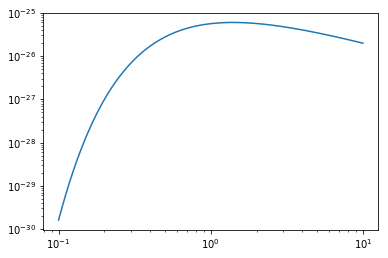

In [9]:
plt.loglog(wavelength, freefree)
plt.show()